# **Importar librerias**

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.4 MB)


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Configuración de las rutas
train_dir = 'data'  # Ruta al directorio de las carpetas COVID-19 y normal

2024-10-23 20:03:23.049440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 20:03:23.216836: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 20:03:23.392585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 20:03:23.620459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 20:03:23.676876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 20:03:24.088117: I tensorflow/core/platform/cpu_feature_gu

In [6]:
# Parámetros de preprocesamiento
img_width, img_height = 150, 150  # Tamaño de las imágenes
batch_size = 32  # Tamaño del lote

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalizar las imágenes
    shear_range=0.2,        # Transformaciones de corte
    zoom_range=0.2,         # Zoom en las imágenes
    horizontal_flip=True     # Voltear las imágenes horizontalmente
)

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'      # Usamos 'binary' para clasificación binaria
)

Found 60 images belonging to 2 classes.


In [11]:
# Poner tipo de letra Palatino Linotype instalada en mi sistema
plt.rcParams['font.family'] = 'Dejavu serif'

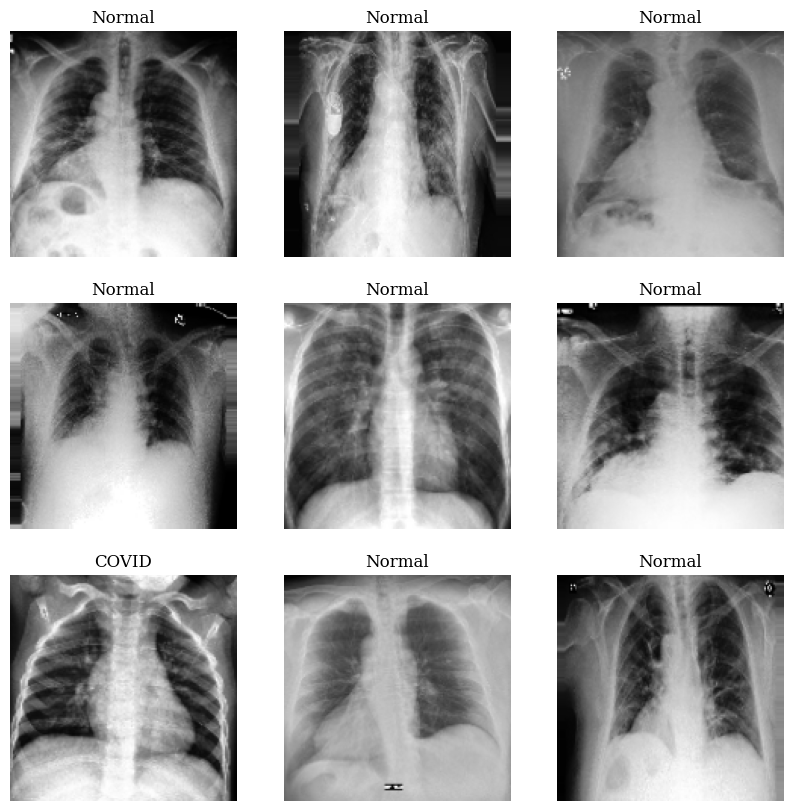

In [12]:
# Mostrar algunas imágenes del generador
def mostrar_imagenes(generator):
    batch = next(generator)
    imagenes, etiquetas = batch[0], batch[1]
    
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(imagenes[i])
        plt.title('COVID' if etiquetas[i] == 1 else 'Normal')
        plt.axis('off')
    plt.show()

mostrar_imagenes(train_generator)

# **Entrenamiento del modelo**

In [13]:
# Construcción del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-23 20:06:50.257707: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18939904 exceeds 10% of free system memory.
2024-10-23 20:06:50.279026: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18939904 exceeds 10% of free system memory.
2024-10-23 20:06:50.281396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18939904 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Entrenamiento del modelo
epochs = 10  # Puedes ajustar el número de épocas según tu necesidad

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=train_generator,  # Para validar, puedes usar el mismo generador en este ejemplo
    validation_steps=train_generator.samples // batch_size
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-10-23 20:07:24.110482: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18939904 exceeds 10% of free system memory.
2024-10-23 20:07:24.135718: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18939904 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5938 - loss: 0.6868 - val_accuracy: 0.4688 - val_loss: 2.8641
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4286 - loss: 3.1489 - val_accuracy: 0.4643 - val_loss: 0.9424
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/10


2024-10-23 20:07:33.905144: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/python/3.12.1/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-23 20:07:33.913168: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5938 - loss: 0.7441 - val_accuracy: 0.5625 - val_loss: 0.8488
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3929 - loss: 1.1348 - val_accuracy: 0.4286 - val_loss: 0.7812
Epoch 6/10


2024-10-23 20:07:40.713899: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4688 - loss: 0.7429 - val_accuracy: 0.4375 - val_loss: 0.6879
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5357 - loss: 0.6722 - val_accuracy: 0.8214 - val_loss: 0.6745
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7812 - loss: 0.6765 - val_accuracy: 0.6875 - val_loss: 0.6495


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5104 - loss: 0.6931
Pérdida: 0.6969
Precisión: 0.5000


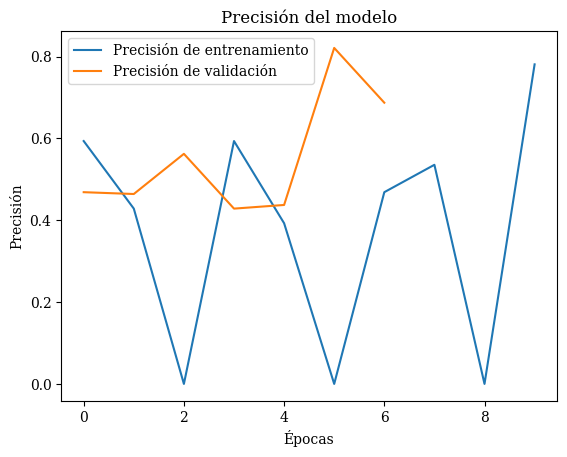

In [15]:
# Evaluar el modelo
loss, accuracy = model.evaluate(train_generator)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy:.4f}')

# Graficar la historia de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend()
plt.show()

# **Ajuste**

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalizar las imágenes
    shear_range=0.2,         # Transformaciones de corte
    zoom_range=0.3,          # Zoom más amplio
    rotation_range=30,       # Rotar imágenes
    width_shift_range=0.2,   # Desplazamientos horizontales
    height_shift_range=0.2,  # Desplazamientos verticales
    horizontal_flip=True,    # Voltear horizontalmente
    fill_mode='nearest'      # Llenar los píxeles faltantes
)

In [17]:
steps_per_epoch = len(train_generator.filenames) // batch_size
validation_steps = steps_per_epoch

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,  # Puedes probar más épocas si lo consideras necesario
    validation_data=train_generator,
    validation_steps=validation_steps
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8125 - loss: 0.5602 - val_accuracy: 0.8750 - val_loss: 0.5156
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8214 - loss: 0.5292 - val_accuracy: 0.8929 - val_loss: 0.4362
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8571 - loss: 0.4949 - val_accuracy: 0.7188 - val_loss: 0.4799
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9375 - loss: 0.3391 - val_accuracy: 0.8214 - val_loss: 0.4251
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20


2024-10-23 20:13:57.411219: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8214 - loss: 0.3736 - val_accuracy: 0.8750 - val_loss: 0.3862
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8750 - loss: 0.3878 - val_accuracy: 0.8929 - val_loss: 0.3063
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8214 - loss: 0.3761 - val_accuracy: 0.8438 - val_loss: 0.3843
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8125 - loss: 0.3895 - val_accuracy: 0.7857 - val_loss: 0.3976
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7143 - loss: 0.5782 - val_accuracy: 0.7812 - val_loss: 0.4447
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6875 - loss: 0.7113 - val_accuracy: 0.6786 - val_loss: 0.6239
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.000

In [23]:
# Calcular los steps_per_epoch
total_train_images = len(train_generator.filenames)
steps_per_epoch = total_train_images // batch_size

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=train_generator,  # Usando el mismo generador para validación debido a falta de datos
    validation_steps=steps_per_epoch
)

# Evaluar el modelo
evaluation = model.evaluate(train_generator, steps=steps_per_epoch)
print(f"Pérdida: {evaluation[0]}")
print(f"Precisión: {evaluation[1]}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9062 - loss: 0.2442 - val_accuracy: 0.9375 - val_loss: 0.2827
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8929 - loss: 0.3385 - val_accuracy: 0.8214 - val_loss: 0.3591
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/10


/usr/local/python/3.12.1/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8214 - loss: 0.3638 - val_accuracy: 0.8438 - val_loss: 0.2808
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8438 - loss: 0.3567 - val_accuracy: 0.8571 - val_loss: 0.3513
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8438 - loss: 0.3372 - val_accuracy: 0.8750 - val_loss: 0.2848
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8571 - loss: 0.3134 - val_accuracy: 0.9286 - val_loss: 0.1512
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9643 - loss: 0.1790 - val_accuracy: 0.9688 - val_loss: 0.1839
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8750 - loss: 0.2837
Pérdida: 0.28373757004737854
Precisión: 0.875
